## A1, Question 1: Manually implement backpropogation for the specified network
Implement the manual backpropogation algorithm for the specified network

In [1]:
import random
import math

K = 5
# Randomly generate the test data, A, B, C, and x
A = [[random.uniform(-1, 1) for _ in range(K)] for _ in range(K)]
B = [[random.uniform(-1, 1) for _ in range(K)] for _ in range(K)]
C = [[random.uniform(-1, 1) for _ in range(K)] for _ in range(K)]
x = [random.uniform(-1, 1) for _ in range(K)]

In [2]:
# Define the sigmoid function
def sigmoid(value):
    return math.exp(value) / (1 + math.exp(value))

def sigmoid_derivative(value):
    return sigmoid(value) * (1 - sigmoid(value))

def matrix_vector_multiplication(matrix, vector):
    if len(matrix) != len(matrix[0]) or len(matrix) != len(vector):
        raise ValueError("Matrix and vector dimensions don't match for multiplication")

    result = [0] * len(vector)
    for i in range(len(matrix)):
        for j in range(len(vector)):
            result[i] += matrix[i][j] * vector[j]

    return result

def outer_product_manual(arr1, arr2):
    # Ensure arr1 and arr2 have the same length
    if len(arr1) != len(arr2):
        raise ValueError("Input arrays must have the same length.")

    outer_result = []
    for i in range(len(arr1)):
        row = [arr1[i] * val for val in arr2]
        outer_result.append(row)

    return outer_result

def matrix_vector_dot_product_manual(matrix, vector):
    # Ensure the matrix has the correct shape (k x k) and the vector has length k
    k = len(vector)
    if len(matrix) != k or len(matrix[0]) != k:
        raise ValueError("Matrix dimensions must be k x k, and the vector must have length k.")

    result = [sum(matrix[i][j] * vector[i] for i in range(k)) for j in range(k)]
    return result

def vector_elementwise_multiply_manual(vector1, vector2):
    # Ensure both vectors have the same length (k)
    k = len(vector1)
    if len(vector2) != k:
        raise ValueError("Both vectors must have the same length (k).")

    result = [vector1[i] * vector2[i] for i in range(k)]
    return result

# Manual Backpropagation
def manual_backpropagation(x, A, B, C):
    K = len(x)
    
    # Initialze all other vectors to zero, of length K
    y, u, v, w = [0] * K, [0] * K, [0] * K, [0] * K

    # Forward propagation
    y = matrix_vector_multiplication(A, x)
    for i in range(K):
        u[i] = sigmoid(y[i])
    v = matrix_vector_multiplication(B, x)
    z = [u + v for u, v in zip(u, v)]
    w = matrix_vector_multiplication(C, z)

    L = sum(val ** 2 for val in w)

    #Backpropagation
    #Compute gradients ∂L/∂A, ∂L/∂B, ∂L/∂C
    dL_dw = [round(2 * val, 4) for val in w]
    dL_dz = matrix_vector_dot_product_manual(C, dL_dw)

    #Compute gradient ∂L/∂A
    y_prime = []
    for i in range(K):
        y_prime.append(sigmoid_derivative(y[i]))

    dL_dy = vector_elementwise_multiply_manual(dL_dz, y_prime)
    dL_dA = outer_product_manual(dL_dy, x)

    #Compute gradient ∂L/∂b
    dL_dv = dL_dz # dz_dv = 1
    dL_dB = outer_product_manual(dL_dv, x)

    #Compute gradient ∂L/∂C
    dL_dC = outer_product_manual(dL_dw, z)

    return dL_dA, dL_dB, dL_dC, L


# Manual Backpropagation
dL_dA, dL_dB, dL_dC, loss = manual_backpropagation(x, A, B, C)

print(f"Manual Backpropagation Loss: {loss}")
print("Manual Backpropagation Gradient ∂L/∂A:")
print(dL_dA)
print("Manual Backpropagation Gradient ∂L/∂B:")
print(dL_dB)
print("Manual Backpropagation Gradient ∂L/∂C:")
print(dL_dC)

Manual Backpropagation Loss: 7.339611520743741
Manual Backpropagation Gradient ∂L/∂A:
[[0.7656040003265202, -0.6706772442284711, -0.6581914505808611, 0.14483434200444803, 0.5910220452057664], [-1.5048668199279713, 1.3182793340809476, 1.293737329895047, -0.28468554967795145, -1.1617095329919982], [0.7227027391267578, -0.633095283288989, -0.621309141542798, 0.13671842838020032, 0.5579036300389484], [-1.5251801828149192, 1.336074055942668, 1.3112007728486281, -0.2885283620801514, -1.1773908059128955], [-1.1765475927515539, 1.0306682003669254, 1.0114805649138412, -0.22257524302434845, -0.9082574859240287]]
Manual Backpropagation Gradient ∂L/∂B:
[[3.0846892853922863, -2.7022206105841406, -2.651914193862212, 0.5835509515982434, 2.381282450848384], [-6.590824166415761, 5.773632043773184, 5.666146097416514, -1.2468295372055611, -5.087907556341567], [2.89950169464978, -2.539994312169394, -2.4927080129535426, 0.5485177975902434, 2.2383234948075517], [-6.561909865120018, 5.748302808419725, 5.6412

## Program to find the argmin for A,B,C using GD
This next section will be a program that computes the argmin for A,B,C using gradient descent for any x1, x2, . . . , xN in R^K

First Loss, Learning Rate 0.01, Value: 13.307202307634064
Last Loss, Learning Rate 0.01, Value: 0.02257814032054838


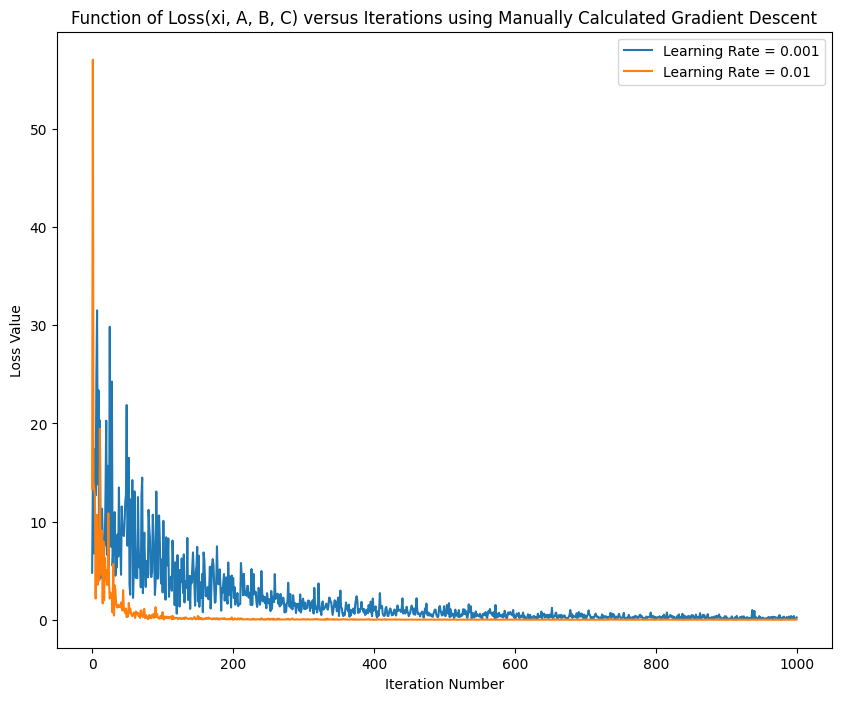

In [5]:
import matplotlib.pyplot as plt

def elementwise_scalar_matrix_multiplication_manual(scalar, matrix):
  # Get the dimensions of the matrix (rows and columns)
    rows, columns = len(matrix), len(matrix[0])

    # Perform element-wise multiplication with the scalar
    result = [[scalar * matrix[i][j] for j in range(columns)] for i in range(rows)]

    return result

def elementwise_matrix_addition_manual(matrix1, matrix2):
    # Ensure both matrices have the same dimensions
    if len(matrix1) != len(matrix2) or len(matrix1[0]) != len(matrix2[0]):
        raise ValueError("Both matrices must have the same dimensions.")

    rows, columns = len(matrix1), len(matrix1[0])
    result = [[matrix1[i][j] + matrix2[i][j] for j in range(columns)] for i in range(rows)]

    return result

def arg_min_function(N_value, K_value, learning_rate = 0.01):
  """
  :param N: Number of iterations
  :param K: Number of dimensions for the matrix A, B, C
  """
  loss_over_iterations = []

  A_arg = [[random.uniform(-1, 1) for _ in range(K_value)] for _ in range(K_value)]
  B_arg = [[random.uniform(-1, 1) for _ in range(K_value)] for _ in range(K_value)]
  C_arg = [[random.uniform(-1, 1) for _ in range(K_value)] for _ in range(K_value)]
  x_to_iterate = [[random.uniform(-1, 1) for _ in range(K_value)] for _ in range(N_value)]

  for i in range(N_value):
    grad_A, grad_B, grad_C, loss = manual_backpropagation(x_to_iterate[i], A_arg, B_arg, C_arg)
    loss_over_iterations.append(loss)

    # Update weights for A
    grad_A_scaled = elementwise_scalar_matrix_multiplication_manual(-learning_rate, grad_A)
    A_arg = elementwise_matrix_addition_manual(A_arg, grad_A_scaled)
    # Update weights for B
    grad_B_scaled = elementwise_scalar_matrix_multiplication_manual(-learning_rate, grad_B)
    B_arg = elementwise_matrix_addition_manual(B_arg, grad_B_scaled)
    # Update weights for C
    grad_C_scaled = elementwise_scalar_matrix_multiplication_manual(-learning_rate, grad_C)
    C_arg = elementwise_matrix_addition_manual(C_arg, grad_C_scaled)

  return loss_over_iterations

# Find the arg min of the loss function. Use N datapoints of x, with dimension K
N_arg = 1000
K_arg = 8
loss_over_iterations_001 = arg_min_function(N_arg, K_arg, learning_rate=0.01)
loss_over_iterations_0001 = arg_min_function(N_arg, K_arg, learning_rate=0.001)

print(f"First Loss, Learning Rate 0.01, Value: {loss_over_iterations_001[0]}")
print(f"Last Loss, Learning Rate 0.01, Value: {loss_over_iterations_001[-1]}")

plt.figure(figsize=(10, 8))
plt.plot(range(N_arg), loss_over_iterations_0001, label=f"Learning Rate = 0.001")
plt.plot(range(N_arg), loss_over_iterations_001, label=f"Learning Rate = 0.01")
plt.title(f"Function of Loss(xi, A, B, C) versus Iterations using Manually Calculated Gradient Descent")
plt.xlabel("Iteration Number")
plt.ylabel("Loss Value")
plt.legend()
plt.show()


## Verify the gradients using libraries - Torch, mxnet
The following 2 code sections verify the gradients using both torch and mxnet on the same input A, B, C, x that was generated above.

In [ ]:
import torch

A_torch = torch.tensor(A, requires_grad=True, dtype=torch.float32)
B_torch = torch.tensor(B, requires_grad=True, dtype=torch.float32)
C_torch = torch.tensor(C, requires_grad=True, dtype=torch.float32)
x_torch = torch.tensor(x, dtype=torch.float32)

# Define the sigmoid function
def sigmoid(value):
    return 1 / (1 + torch.exp(-value))

def forwardpropagation_torch(x, A, B, C):
    y = torch.matmul(A, x.unsqueeze(1)).squeeze()
    u = sigmoid(y)
    v = torch.matmul(B, x.unsqueeze(1)).squeeze()
    z = u + v
    w = torch.matmul(C, z.unsqueeze(1)).squeeze()
    L = torch.norm(w, p=2)**2
    return L

def backwardpropagation_torch(L_torch):
    L_torch.backward()
    dA = A_torch.grad
    dB = B_torch.grad
    dC = C_torch.grad
    return dA, dB, dC

L_torch = forwardpropagation_torch(x_torch, A_torch, B_torch, C_torch)
print(f"Loss (torch): {L_torch}")
dA_torch, dB_torch, dC_torch = backwardpropagation_torch(L_torch)


print(f"Gradients (torch) dL/dA:\n{dA_torch}")
print(f"Gradients (torch) dL/dB:\n{dB_torch}")
print(f"Gradients (torch) dL/dC:\n{dC_torch}")

Loss (torch): 7.089563369750977
Gradients (torch) dL/dA:
tensor([[-0.2239, -0.1563, -0.4215, -0.3370, -0.2546],
        [ 0.5133,  0.3583,  0.9665,  0.7727,  0.5837],
        [-0.1491, -0.1041, -0.2807, -0.2244, -0.1695],
        [-0.3850, -0.2688, -0.7250, -0.5796, -0.4378],
        [ 0.2778,  0.1939,  0.5231,  0.4182,  0.3159]])
Gradients (torch) dL/dB:
tensor([[-1.0469, -0.7309, -1.9714, -1.5760, -1.1906],
        [ 2.0588,  1.4373,  3.8767,  3.0992,  2.3414],
        [-0.7402, -0.5168, -1.3938, -1.1143, -0.8418],
        [-2.6464, -1.8475, -4.9832, -3.9837, -3.0096],
        [ 1.3390,  0.9348,  2.5213,  2.0156,  1.5228]])
Gradients (torch) dL/dC:
tensor([[ 0.9602, -0.9416,  0.8110,  0.7226,  0.5573],
        [ 5.9114, -5.7966,  4.9928,  4.4487,  3.4308],
        [-2.1007,  2.0600, -1.7743, -1.5810, -1.2192],
        [ 1.5309, -1.5012,  1.2930,  1.1521,  0.8885],
        [ 0.5634, -0.5524,  0.4758,  0.4240,  0.3270]])


In [ ]:
import mxnet as mx
from mxnet import autograd

x_mx = mx.nd.array(x_torch.detach().numpy())
A_mx = mx.nd.array(A_torch.detach().numpy())
B_mx = mx.nd.array(B_torch.detach().numpy())
C_mx = mx.nd.array(C_torch.detach().numpy())

def sigmoid(value):
    return 1 / (1 + mx.nd.exp(-value))

def forwardpropagation_mx(x, A, B, C):
    y = mx.nd.dot(A, x)
    u = sigmoid(y)
    v = mx.nd.dot(B, x)
    z = u + v
    w = mx.nd.dot(C, z)
    L = mx.nd.norm(w) ** 2
    return L

def backwardpropagation_mx(L_mx):
    L_mx.backward()
    dA = A_mx.grad
    dB = B_mx.grad
    dC = C_mx.grad
    return dA, dB, dC

A_mx.attach_grad()
B_mx.attach_grad()
C_mx.attach_grad()

with autograd.record():
    L_mx = forwardpropagation_mx(x_mx, A_mx, B_mx, C_mx)
    print(f"Loss (mx): {L_mx}")

dA_mx, dB_mx, dC_mx = backwardpropagation_mx(L_mx)

print(f"Gradients (mx) dL/dA:\n{dA_mx}")
print(f"Gradients (mx) dL/dB:\n{dB_mx}")
print(f"Gradients (mx) dL/dC:\n{dC_mx}")


Loss (mx): 
[7.089565]
<NDArray 1 @cpu(0)>
Gradients (mx) dL/dA:

[[-0.2238626  -0.15628324 -0.4215336  -0.33698747 -0.25458705]
 [ 0.5132884   0.35833752  0.9665228   0.77266926  0.58373564]
 [-0.14905694 -0.10405981 -0.28067443 -0.22438012 -0.16951454]
 [-0.3849986  -0.2687757  -0.7249529  -0.57955056 -0.43783844]
 [ 0.27778035  0.19392437  0.52306086  0.4181516   0.31590486]]
<NDArray 5x5 @cpu(0)>
Gradients (mx) dL/dB:

[[-1.0469201  -0.73087716 -1.9713521  -1.575962   -1.1906066 ]
 [ 2.058811    1.4372996   3.876744    3.0991933   2.3413763 ]
 [-0.7402193  -0.5167628  -1.393834   -1.1142755  -0.8418121 ]
 [-2.6464229  -1.847524   -4.983218   -3.9837441  -3.0096364 ]
 [ 1.338993    0.9347794   2.5213258   2.0156286   1.5227656 ]]
<NDArray 5x5 @cpu(0)>
Gradients (mx) dL/dC:

[[ 0.9602008  -0.9415689   0.8109933   0.72262216  0.55727637]
 [ 5.9113526  -5.796648    4.992776    4.4487305   3.4308002 ]
 [-2.1007464   2.0599833  -1.7743073  -1.5809671  -1.2192203 ]
 [ 1.5308906  -1.501185